# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config2 import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
city_two = []
cloudiness = []
date = []
humidity = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q="

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | tuatapere
Processing Record 4 of Set 1 | mahibadhoo
Processing Record 5 of Set 1 | padang
Processing Record 6 of Set 1 | jamundi
Processing Record 7 of Set 1 | port blair
Processing Record 8 of Set 1 | yabrud
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | kristianstad
Processing Record 14 of Set 1 | tasiilaq
City not found. Skipping...
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | alampur
Processing Record 22 of Set 1 | lebu
Processing Record 23 of Set 1 | juneau
Processing Record 24 of Set 1 

Processing Record 37 of Set 4 | cururupu
City not found. Skipping...
Processing Record 38 of Set 4 | vao
Processing Record 39 of Set 4 | wanaka
Processing Record 40 of Set 4 | beidao
Processing Record 41 of Set 4 | qinhuangdao
Processing Record 42 of Set 4 | lapua
Processing Record 43 of Set 4 | kara
Processing Record 44 of Set 4 | barranca
Processing Record 45 of Set 4 | mehamn
Processing Record 46 of Set 4 | kualakapuas
Processing Record 47 of Set 4 | makat
City not found. Skipping...
Processing Record 48 of Set 4 | dawei
Processing Record 49 of Set 4 | kinkala
Processing Record 1 of Set 5 | barrow
Processing Record 2 of Set 5 | nokaneng
Processing Record 3 of Set 5 | qasigiannguit
Processing Record 4 of Set 5 | gatchina
City not found. Skipping...
Processing Record 5 of Set 5 | praia
Processing Record 6 of Set 5 | klaksvik
Processing Record 7 of Set 5 | touros
Processing Record 8 of Set 5 | oudtshoorn
Processing Record 9 of Set 5 | rundu
Processing Record 10 of Set 5 | marzuq
Proces

Processing Record 29 of Set 8 | tezu
Processing Record 30 of Set 8 | redmond
Processing Record 31 of Set 8 | palmer
Processing Record 32 of Set 8 | perelyub
Processing Record 33 of Set 8 | daru
Processing Record 34 of Set 8 | bom jesus
Processing Record 35 of Set 8 | constitucion
Processing Record 36 of Set 8 | zyryanka
Processing Record 37 of Set 8 | geraldton
Processing Record 38 of Set 8 | aneho
Processing Record 39 of Set 8 | paoua
Processing Record 40 of Set 8 | dalbandin
City not found. Skipping...
Processing Record 41 of Set 8 | indramayu
Processing Record 42 of Set 8 | gari
Processing Record 43 of Set 8 | rio de jesus
Processing Record 44 of Set 8 | meulaboh
Processing Record 45 of Set 8 | sabha
Processing Record 46 of Set 8 | bilma
Processing Record 47 of Set 8 | wenzhou
Processing Record 48 of Set 8 | azangaro
City not found. Skipping...
Processing Record 49 of Set 8 | kallaste
Processing Record 1 of Set 9 | santa marinella
Processing Record 2 of Set 9 | nioro
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
weather_summary = {
    "City": city_two,
    "Cloudiness": cloudiness,
    "Country": countries,
    "Date": date,
    "Humidity": humidity,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
}

In [18]:
weather_df = pd.DataFrame(weather_summary)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,talnakh,75,RU,1572555758,84,69.49,88.39,-0.41,20.13
1,busselton,75,AU,1572555758,98,-33.64,115.35,48.99,24.52
2,tuatapere,91,NZ,1572555758,76,-46.13,167.69,52.00,11.99
3,mahibadhoo,100,MV,1572555758,74,3.78,72.97,80.82,4.14
4,padang,68,ID,1572555758,97,-0.92,100.36,65.53,1.57


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

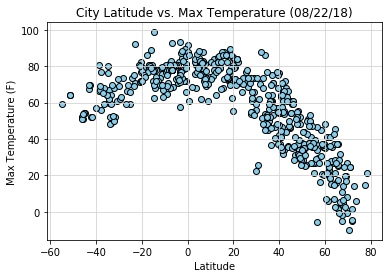

In [21]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("LatitudevTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

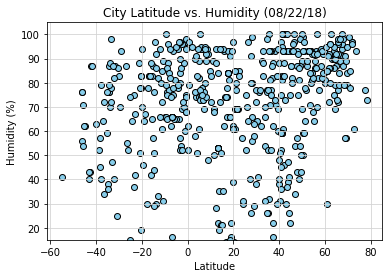

In [24]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("LatitudevHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

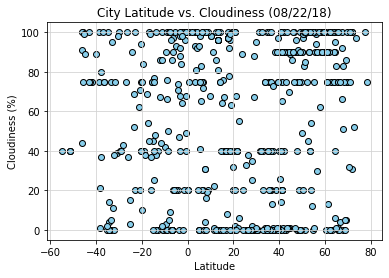

In [26]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("LatitudevCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

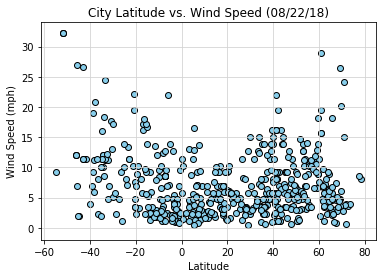

In [28]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("LatitudevWindSpeed.png")
plt.show()